In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import cv2
import imghdr
import os
from matplotlib import pyplot as plt

In [2]:
# This avoids OOM errors by limiting the load on the GPUs
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

data_dir = 'train'

'''for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path) '''

"for image_class in os.listdir(data_dir): \n    for image in os.listdir(os.path.join(data_dir, image_class)):\n        image_path = os.path.join(data_dir, image_class, image)\n        try: \n            img = cv2.imread(image_path)\n            tip = imghdr.what(image_path)\n            if tip not in image_exts: \n                print('Image not in ext list {}'.format(image_path))\n                os.remove(image_path)\n        except Exception as e: \n            print('Issue with image {}'.format(image_path))\n            # os.remove(image_path) "

In [5]:
data = tf.keras.utils.image_dataset_from_directory('train')

Found 28045 files belonging to 17 classes.


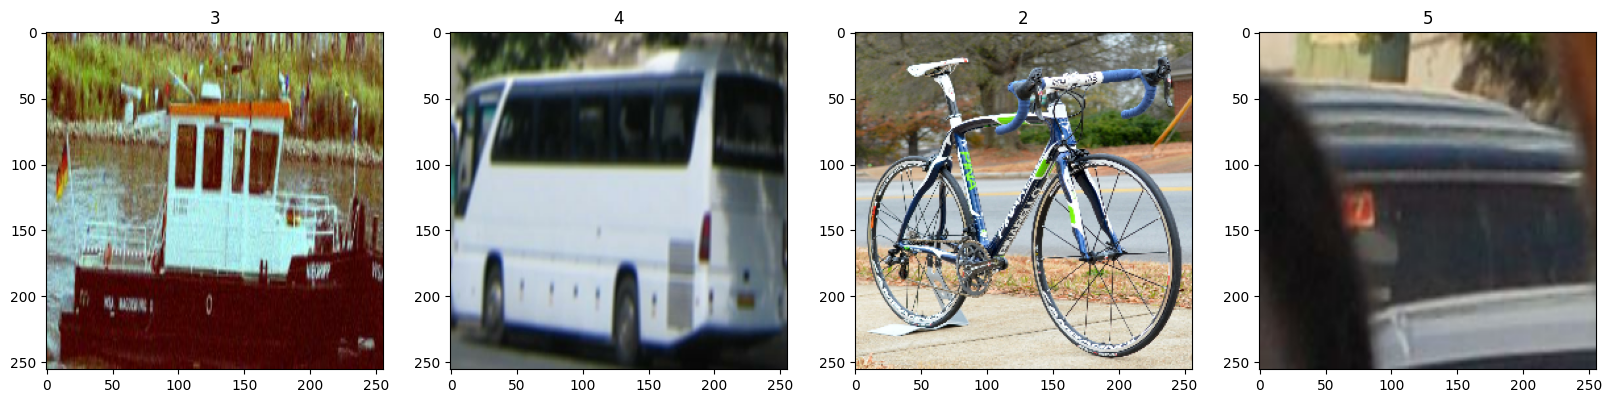

In [6]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [7]:
data = data.map(lambda x,y: (x/255, y))

In [8]:
data.as_numpy_iterator().next()

(array([[[[1.87087297e-01, 2.02773571e-01, 2.14538276e-01],
          [6.79662377e-02, 8.36525112e-02, 8.78804550e-02],
          [4.83906716e-01, 5.01952052e-01, 4.90953267e-01],
          ...,
          [2.54067272e-01, 2.54067272e-01, 2.54067272e-01],
          [2.24914193e-01, 2.24914193e-01, 2.24914193e-01],
          [2.27652162e-01, 2.27652162e-01, 2.27652162e-01]],
 
         [[2.15047315e-01, 2.30733588e-01, 2.42498294e-01],
          [1.19210280e-01, 1.34896547e-01, 1.39124498e-01],
          [4.82637167e-01, 5.00682533e-01, 4.89683747e-01],
          ...,
          [2.53316909e-01, 2.54450351e-01, 2.53883630e-01],
          [2.42794082e-01, 2.42794082e-01, 2.42794082e-01],
          [2.32789516e-01, 2.32789516e-01, 2.32789516e-01]],
 
         [[1.89179063e-01, 2.03356519e-01, 2.15121225e-01],
          [3.33716601e-01, 3.49218875e-01, 3.53446811e-01],
          [6.22605324e-01, 6.40650690e-01, 6.29651904e-01],
          ...,
          [2.59446084e-01, 2.64164239e-01, 2.6180

In [9]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [10]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping

In [12]:
'''model = Sequential()

model.add(Conv2D(16, (3, 3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(17, activation='softmax'))'''

'''model = Sequential()
model.add(Conv2D(16, (3, 3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(17, activation='softmax'))'''

In [23]:
model = Sequential()

model.add(Conv2D(50, kernel_size=(5, 5), strides=(1, 1), padding='same', activation='relu', input_shape=(256, 256, 3)))

model.add(Conv2D(75, kernel_size=(5, 5), strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(125, kernel_size=(5, 5), strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(10, activation='softmax'))


ResourceExhaustedError: {{function_node __wrapped__StatelessRandomUniformV2_device_/job:localhost/replica:0/task:0/device:GPU:0}} OOM when allocating tensor with shape[512000,500] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc [Op:StatelessRandomUniformV2]

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
logdir='logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[early_stopping])

Epoch 1/20
613/613 [==============================] - 131s 201ms/step - loss: 2.2531 - accuracy: 0.4301 - val_loss: 1.9638 - val_accuracy: 0.5298
Epoch 2/20
613/613 [==============================] - 127s 207ms/step - loss: 1.9782 - accuracy: 0.5213 - val_loss: 1.8082 - val_accuracy: 0.5744
Epoch 3/20
613/613 [==============================] - 131s 213ms/step - loss: 1.9120 - accuracy: 0.5479 - val_loss: 1.7468 - val_accuracy: 0.5936
Epoch 4/20
613/613 [==============================] - 131s 212ms/step - loss: 1.8651 - accuracy: 0.5601 - val_loss: 1.7078 - val_accuracy: 0.6058
Epoch 5/20
613/613 [==============================] - 125s 203ms/step - loss: 1.8303 - accuracy: 0.5784 - val_loss: 1.7062 - val_accuracy: 0.6135
Epoch 6/20
613/613 [==============================] - 119s 193ms/step - loss: 1.8054 - accuracy: 0.5828 - val_loss: 1.7039 - val_accuracy: 0.6124
Epoch 7/20
613/613 [==============================] - 122s 199ms/step - loss: 1.7957 - accuracy: 0.5804 - val_loss: 1.6775 -

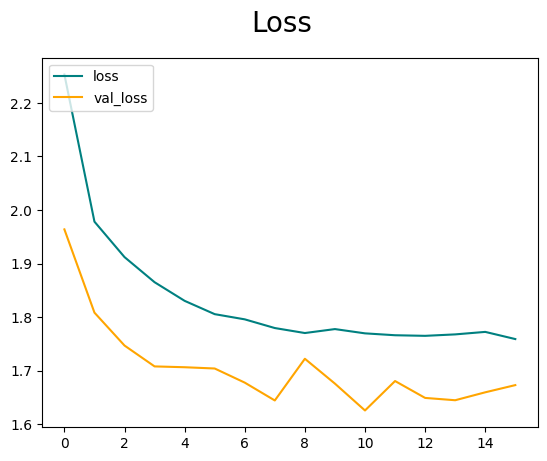

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

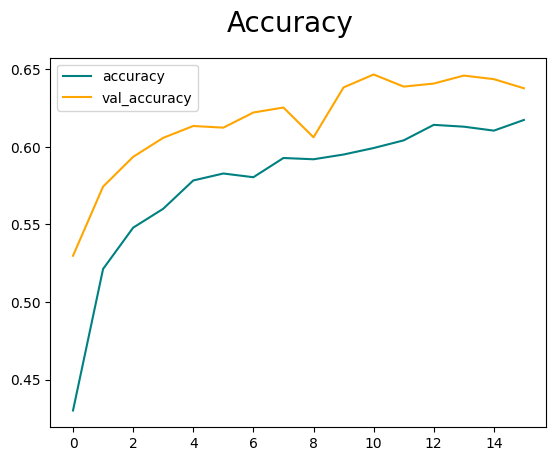

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()